<a href="https://colab.research.google.com/github/geocarvalho/uni-proj/blob/master/IN1119/stat_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados populacionais gerais
## Teste de normalidade (Shapiro-Wilk)


In [0]:
library('ggplot2')
library('dplyr')
set.seed(1234)

In [161]:
# Open file
df <- read.csv('suicidio_prop_100k_hab_ano_2010-2017.csv')

# Transpose columns as rows
# t_df <- setNames(data.frame(t(df[,-1])), df[,1])
# t_df <- tibble::rowid_to_column(t_df, 'month')
df$proporcao <- df$obitos_por_residencia / df$pop_br_ibge
df$proporcao_100k <- (df$obitos_por_residencia * 100000) / df$pop_br_ibge

df

ano_do_obito,obitos_por_residencia,pop_br_ibge,proporcao,proporcao_100k
<int>,<int>,<int>,<dbl>,<dbl>
2010,9448,194890682,4.847846e-05,4.847846
2011,9852,196603732,5.011095e-05,5.011095
2012,10321,198314934,5.204348e-05,5.204348
2013,10533,200004188,5.266390e-05,5.266390
2014,10653,201717541,5.281147e-05,5.281147
2015,11178,203475683,5.493531e-05,5.493531
2016,11433,205156587,5.572816e-05,5.572816
2017,12495,206804741,6.041931e-05,6.041931


In [162]:
# Normality test with Shapiro-Wilk for proportion (100k) during the years
shapiro.test(df$proporcao_100k)


	Shapiro-Wilk normality test

data:  df$proporcao_100k
W = 0.95513, p-value = 0.7627


> Como vimos, não conseguimos rejeitar a hipótese nula para as proporções a cada 100 mil habitantes (`p > 0.05`). Assim, esses conjuntos de dados foram extraídos de uma população com distribuição normal.

## Análise gráfica

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

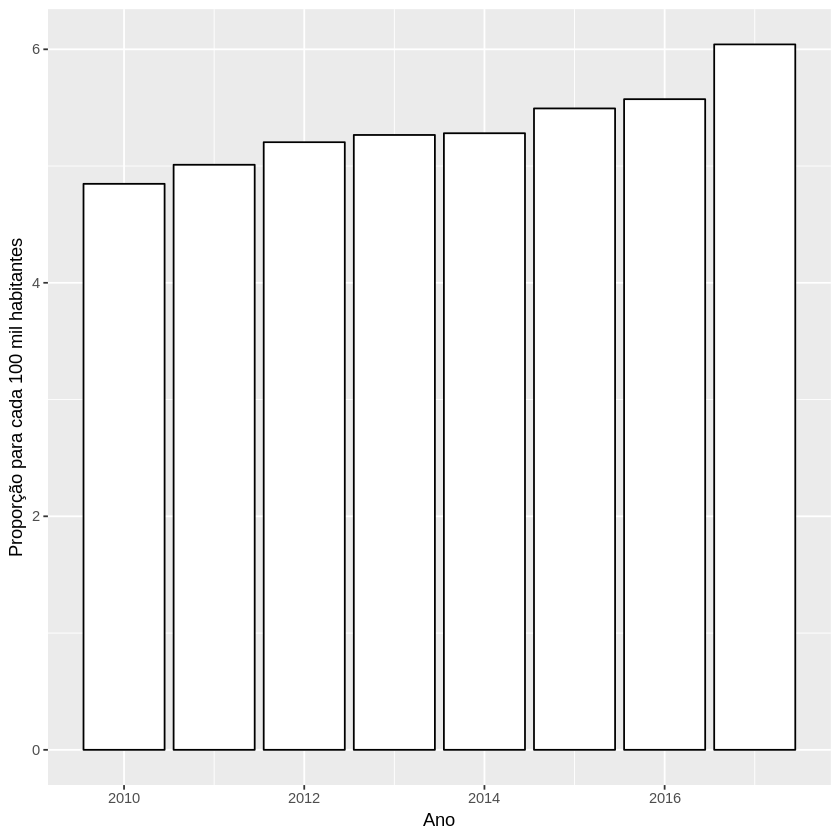

In [163]:
# Plot graph to 2015 col
ggplot(df, aes(df$ano_do_obito, df$proporcao_100k)) + 
geom_histogram(stat='identity', fill='white', colour='black') + 
labs(x='Ano', y='Proporção para cada 100 mil habitantes')

## Teste de hipótese para duas proporções

In [165]:
# There are difference between 2015 and 2016 proportions
prop.test(
  x=c(df$obitos_por_residencia[6], df$obitos_por_residencia[7]), 
  n=c(df$pop_br_ibge[6], df$pop_br_ibge[7]),
  alternative='two.sided')


	2-sample test for equality of proportions with continuity correction

data:  c(df$obitos_por_residencia[6], df$obitos_por_residencia[7]) out of c(df$pop_br_ibge[6], df$pop_br_ibge[7])
X-squared = 1.1463, df = 1, p-value = 0.2843
alternative hypothesis: two.sided
95 percent confidence interval:
 -2.240142e-06  6.544363e-07
sample estimates:
      prop 1       prop 2 
5.493531e-05 5.572816e-05 


> Ao nível de 95 % de confiança **não há forte evidência** de diferença (`p > 0.05`) entre as proporções de suicídios de 2015 e 2016. Ao contrário do que foi afirmado na reportagem, em que houve aumento de um ano para o outro

In [166]:
# And about 2016 to 2017?
prop.test(
  x=c(df$obitos_por_residencia[7], df$obitos_por_residencia[8]), 
  n=c(df$pop_br_ibge[7], df$pop_br_ibge[8]),
  alternative='two.sided')


	2-sample test for equality of proportions with continuity correction

data:  c(df$obitos_por_residencia[7], df$obitos_por_residencia[8]) out of c(df$pop_br_ibge[7], df$pop_br_ibge[8])
X-squared = 38.942, df = 1, p-value = 4.365e-10
alternative hypothesis: two.sided
95 percent confidence interval:
 -6.167621e-06 -3.214673e-06
sample estimates:
      prop 1       prop 2 
5.572816e-05 6.041931e-05 


> Ao nível de 95 % de confiança **há fortes evidências** da diferença (`p < 0.05`) de proporções de suicídios de 2016 e 2017.[link text](https://)

# Análise populacional separada por sexo
## Abrindo o arquivo

In [182]:
# Open file
df_hm <- read.csv('suicidio_prop_masc_fem_ano.csv')

# Transpose columns as rows
# t_df <- setNames(data.frame(t(df[,-1])), df[,1])
# t_df <- tibble::rowid_to_column(t_df, 'month')
# df$prop_masc <- df$masc / df$pop_masc_ibge
# df$prop_fem <- df$fem / df$pop_fem_ibge
df_hm$prop_masc_100k <- (df_hm$masc * 100000) / df_hm$pop_masc_ibge
df_hm$prop_fem_100k <- (df_hm$fem * 100000) / df_hm$pop_fem_ibge
df_hm

ano,masc,fem,lgn,total,pop_masc_ibge,pop_fem_ibge,prop_masc_100k,prop_fem_100k
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
2017,9826,2664,5,12495,101163599,105641142,9.712980,2.521745
2016,9053,2378,2,11433,100379640,104776947,9.018761,2.269583
2015,8780,2396,2,11178,99581002,103894681,8.816943,2.306182
2014,8419,2233,1,10653,98744098,102973443,8.526079,2.168520
2013,8309,2223,1,10533,97931331,102072857,8.484517,2.177856
2012,8061,2257,3,10321,96322635,101182880,8.368749,2.230615
2011,7762,2089,1,9852,96322635,100281097,8.058334,2.083144
2010,7375,2073,0,9448,95513298,99377384,7.721438,2.085988


## Checar normalidade das duas amostras com Shapiro-Wilk

In [173]:
# Normalidade da proporcao de suicidios em homens a cada 100 mil habitantes
shapiro.test(df_hm$prop_masc_100k)


	Shapiro-Wilk normality test

data:  df_hm$prop_masc_100k
W = 0.97277, p-value = 0.9188


In [174]:
# Normalidade da proporcao de suicidios em mulheres a cada 100 mil habitantes
shapiro.test(df_hm$prop_fem_100k)


	Shapiro-Wilk normality test

data:  df_hm$prop_fem_100k
W = 0.89551, p-value = 0.2631


> Como vimos, não conseguimos rejeitar a hipótese nula para as proporções de suicídios em homens e em mulheres a cada 100 mil habitantes (`p > 0.05`). Assim, esses conjuntos de dados foram extraídos de uma população com distribuição normal.

## Análise gráfica

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

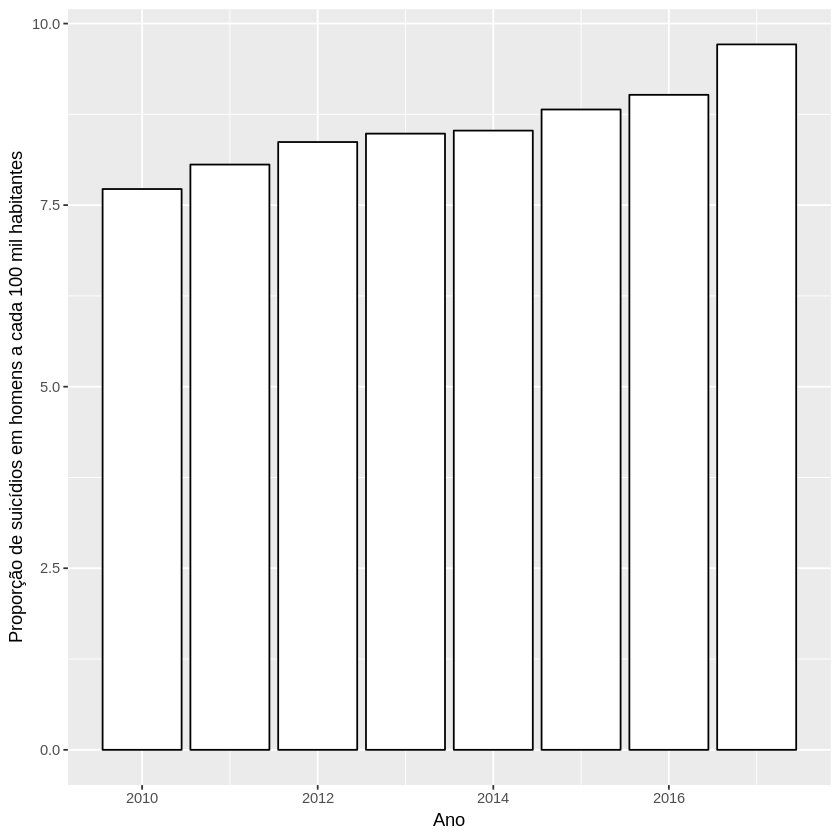

In [175]:
# Plot graph to prop_masc_100k col
ggplot(df_hm, aes(df_hm$ano, df_hm$prop_masc_100k)) + 
geom_histogram(stat='identity', fill='white', colour='black') + 
labs(x='Ano', y='Proporção de suicídios em homens a cada 100 mil habitantes')

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

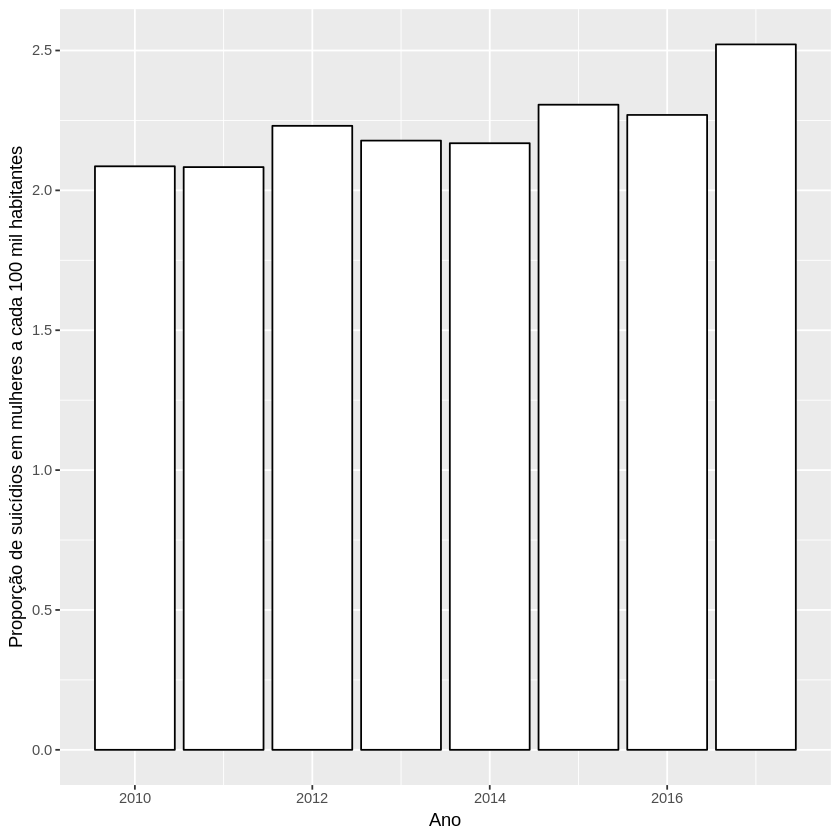

In [176]:
# Plot graph to prop_fem_100k col
ggplot(df_hm, aes(df_hm$ano, df_hm$prop_fem_100k)) + 
geom_histogram(stat='identity', fill='white', colour='black') + 
labs(x='Ano', y='Proporção de suicídios em mulheres a cada 100 mil habitantes')

## Teste de hipótese para as proporções de homens e mulheres

In [184]:
# The male proportion of suicide is greater than the female proportion?
prop.test(
  x=c(df_hm$masc[2], df_hm$fem[2]), 
  n=c(df_hm$pop_masc_ibge[2], df_hm$pop_fem_ibge[2]),
  alternative='greater')


	2-sample test for equality of proportions with continuity correction

data:  c(df_hm$masc[2], df_hm$fem[2]) out of c(df_hm$pop_masc_ibge[2], df_hm$pop_fem_ibge[2])
X-squared = 4190.1, df = 1, p-value < 2.2e-16
alternative hypothesis: greater
95 percent confidence interval:
 6.574517e-05 1.000000e+00
sample estimates:
      prop 1       prop 2 
9.018761e-05 2.269583e-05 


> Ao nível de 95 % de confiança **há fortes evidências** da diferença (`p < 0.05`) de proporções de suicídios de entre homens e mulheresno ano de 2016 assim como indicado na reportagem.

## Referências

1. Dados no [repositório](https://github.com/geocarvalho/uni-proj/blob/master/IN1119/stat_project.ipynb)